# Tarefa 2 - Heart Attack Risk Prediction

## O Dataset

O Dataset <em>heart_attack_prediction_dataset.csv</em> tem como objetivo explorar as dinâmicas que influenciam a saúde do coração e os fatores que o preditam. 

Este dataset é constituído pelos seguintes parâmetros:

- **Patient ID** - Identificador único para cada paciente;

- **Age** - Idade do paciente;
- **Sex** - Género do paciente (Male/Female);
- **Cholesterol** - Níveis de colesterol do paciente;
- **Blood Pressure** - Pressão sanguínea do paciente (systolic/diastolic);
- **Heart Rate** - Frequência cardíaca do paciente;
- **Diabetes** - Se o paciente tem diabetes (Yes/No);
- **Family History** - Histórico familiar de doenças cardíacas (1: Sim, 0: Não);
- **Smoking** - Estado de fumador do paciente (1: Fumador, 0: Não Fumador);
- **Obesity** - Estado de obesidade do paciente (1: Obeso, 0: Não obeso);
- **Alcohol Consumption** - Se o paciente consome álcool (1: Sim, 0: Não);
- **Exercise Hours Per Week** - Número de horas de exercício por semana;
- **Diet** - Hábitos de alimentação do paciente (Healthy/Average/Unhealthy);
- **Previous Heart Problems** - Existência de histórico de problemas cardíacos (1: Sim, 0: Não);
- **Medication Use** - Uso de medicação por parte do paciente (1: Sim, 0: Não);
- **Stress Level** - Níveis de stress reportados pelo paciente (1-10);
- **Sedentary Hours Per Day** - Horas de atividade sedentária por dia;
- **Income** - Nível de rendimento do paciente;
- **BMI** - Índice de massa corporal do paciente;
- **Triglycerides** - Níveis de triglicerídeos do paciente;
- **Physical Activity Days Per Week** - Dias de atividade física por semana;
- **Sleep Hours Per Day** - Horas de sono por dia;
- **Country** - País do paciente;
- **Continent** - Continente onde o paciente reside;
- **Hemisphere** - Hemisfério onde o paciente reside;
- **Heart Attack Risk** - Presença de risco de ataque cardíaco (1 : Sim, 0: Não);

## Import Libraries

In [578]:
! pip install researchpy

In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
import researchpy as rp
%matplotlib inline

## Data Understanding

#### Import Dataset

Iniciamos o estudo do dataset pelo load dos dados numa dataframe panda.

In [580]:
dataf = pd.read_csv('./datasets/heart_attack_prediction_dataset.csv')

Imprimimos as primeiras linhas do dataframe.

In [581]:
dataf.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Imprimimos as últimas linhas do dataframe:

In [582]:
dataf.tail()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0
8762,ZWN9666,25,Female,356,138/67,75,1,1,0,0,...,9.005234,247338,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


De forma a verificarmos quantas entradas e atributos o dataset possui:

In [583]:
dataf.shape

(8763, 26)

É possível verificar que temos 8763 entradas com 26 atributos cada

Em seguida, geramos as estatísticas descritivas:

In [584]:
dataf.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


De forma a obtermos um resumo da informação (número de valores não nulos em cada coluna, o tipo de dados de cada coluna e o uso de memória) contida no Dataframe:

In [585]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

#### Missing Values

Verificamos se existem missing values:

In [586]:
dataf.isna().any()

Patient ID                         False
Age                                False
Sex                                False
Cholesterol                        False
Blood Pressure                     False
Heart Rate                         False
Diabetes                           False
Family History                     False
Smoking                            False
Obesity                            False
Alcohol Consumption                False
Exercise Hours Per Week            False
Diet                               False
Previous Heart Problems            False
Medication Use                     False
Stress Level                       False
Sedentary Hours Per Day            False
Income                             False
BMI                                False
Triglycerides                      False
Physical Activity Days Per Week    False
Sleep Hours Per Day                False
Country                            False
Continent                          False
Hemisphere      

In [587]:
print(dataf.isna().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


#### Duplicated Values

De forma a verificar se o dataset tem linhas duplicadas:

In [588]:
dataf.duplicated().sum()

0

Como é possível verificar o dataset não apresenta missing values nem tem linhas duplicadas.

Através desta análise fomos capazes de verificar que o dataset que escolhemos possui:
- 8763 entradas
- 26 atributos
- Todos valores não nulos
- Não existem missing values

Podemos também verificar que no dataset temos presentes atributos:
- Categóricos (Patient ID, Sex, Diet, Country, Continent, Hemisphere)
    - Binários (Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Previous Heart Problems, Medication Use, Heart Attack Risk)
- Numéricos (Age, Cholesterol, Blood Pressure, Heart Rate, Exercise Hours Per Week, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day)

De forma a preparamos os dados para serem tratados, verificamos se existem valores duplicados:

In [589]:
print(dataf.duplicated().sum())
print(dataf.drop_duplicates(inplace=True))
print(dataf.info())

0
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet         

## Data Preperation

Verificamos que no atributo Continent, temos "Australia" como um valor possível, no entanto o grupo considerou que seria melhor alterar este valor para Oceania, dado que Australia não é um continente

In [590]:
dataf['Continent'] = dataf['Continent'].replace('Australia', 'Oceania')

#### Drop de colunas irrelevantes

Consideramos que a coluna 'Patient ID' não representa um atributo relevante para determinar se o paciente tem ou não maior risco de ter um ataque cardíaco. Desta forma, decidimos removê-la.

Chegamos, também, à conclusão que o nosso objetivo de estudo não se baseia nos fatores geográficos e, assim sendo, consideramos que os atributos **Country**, **Continent**, **Hemisphere** não são relevantes para o nosso estudo pelo que iremos descartá-los do dataset:

In [591]:
columns_to_drop = ["Patient ID","Country", "Continent", "Hemisphere"]
dataf = dataf.drop(columns=columns_to_drop)

Desta forma, os atributos passam a ser apenas 23:

In [592]:
dataf.shape

(8763, 22)

## Data Analysis

#### Distribuição dos Atributos

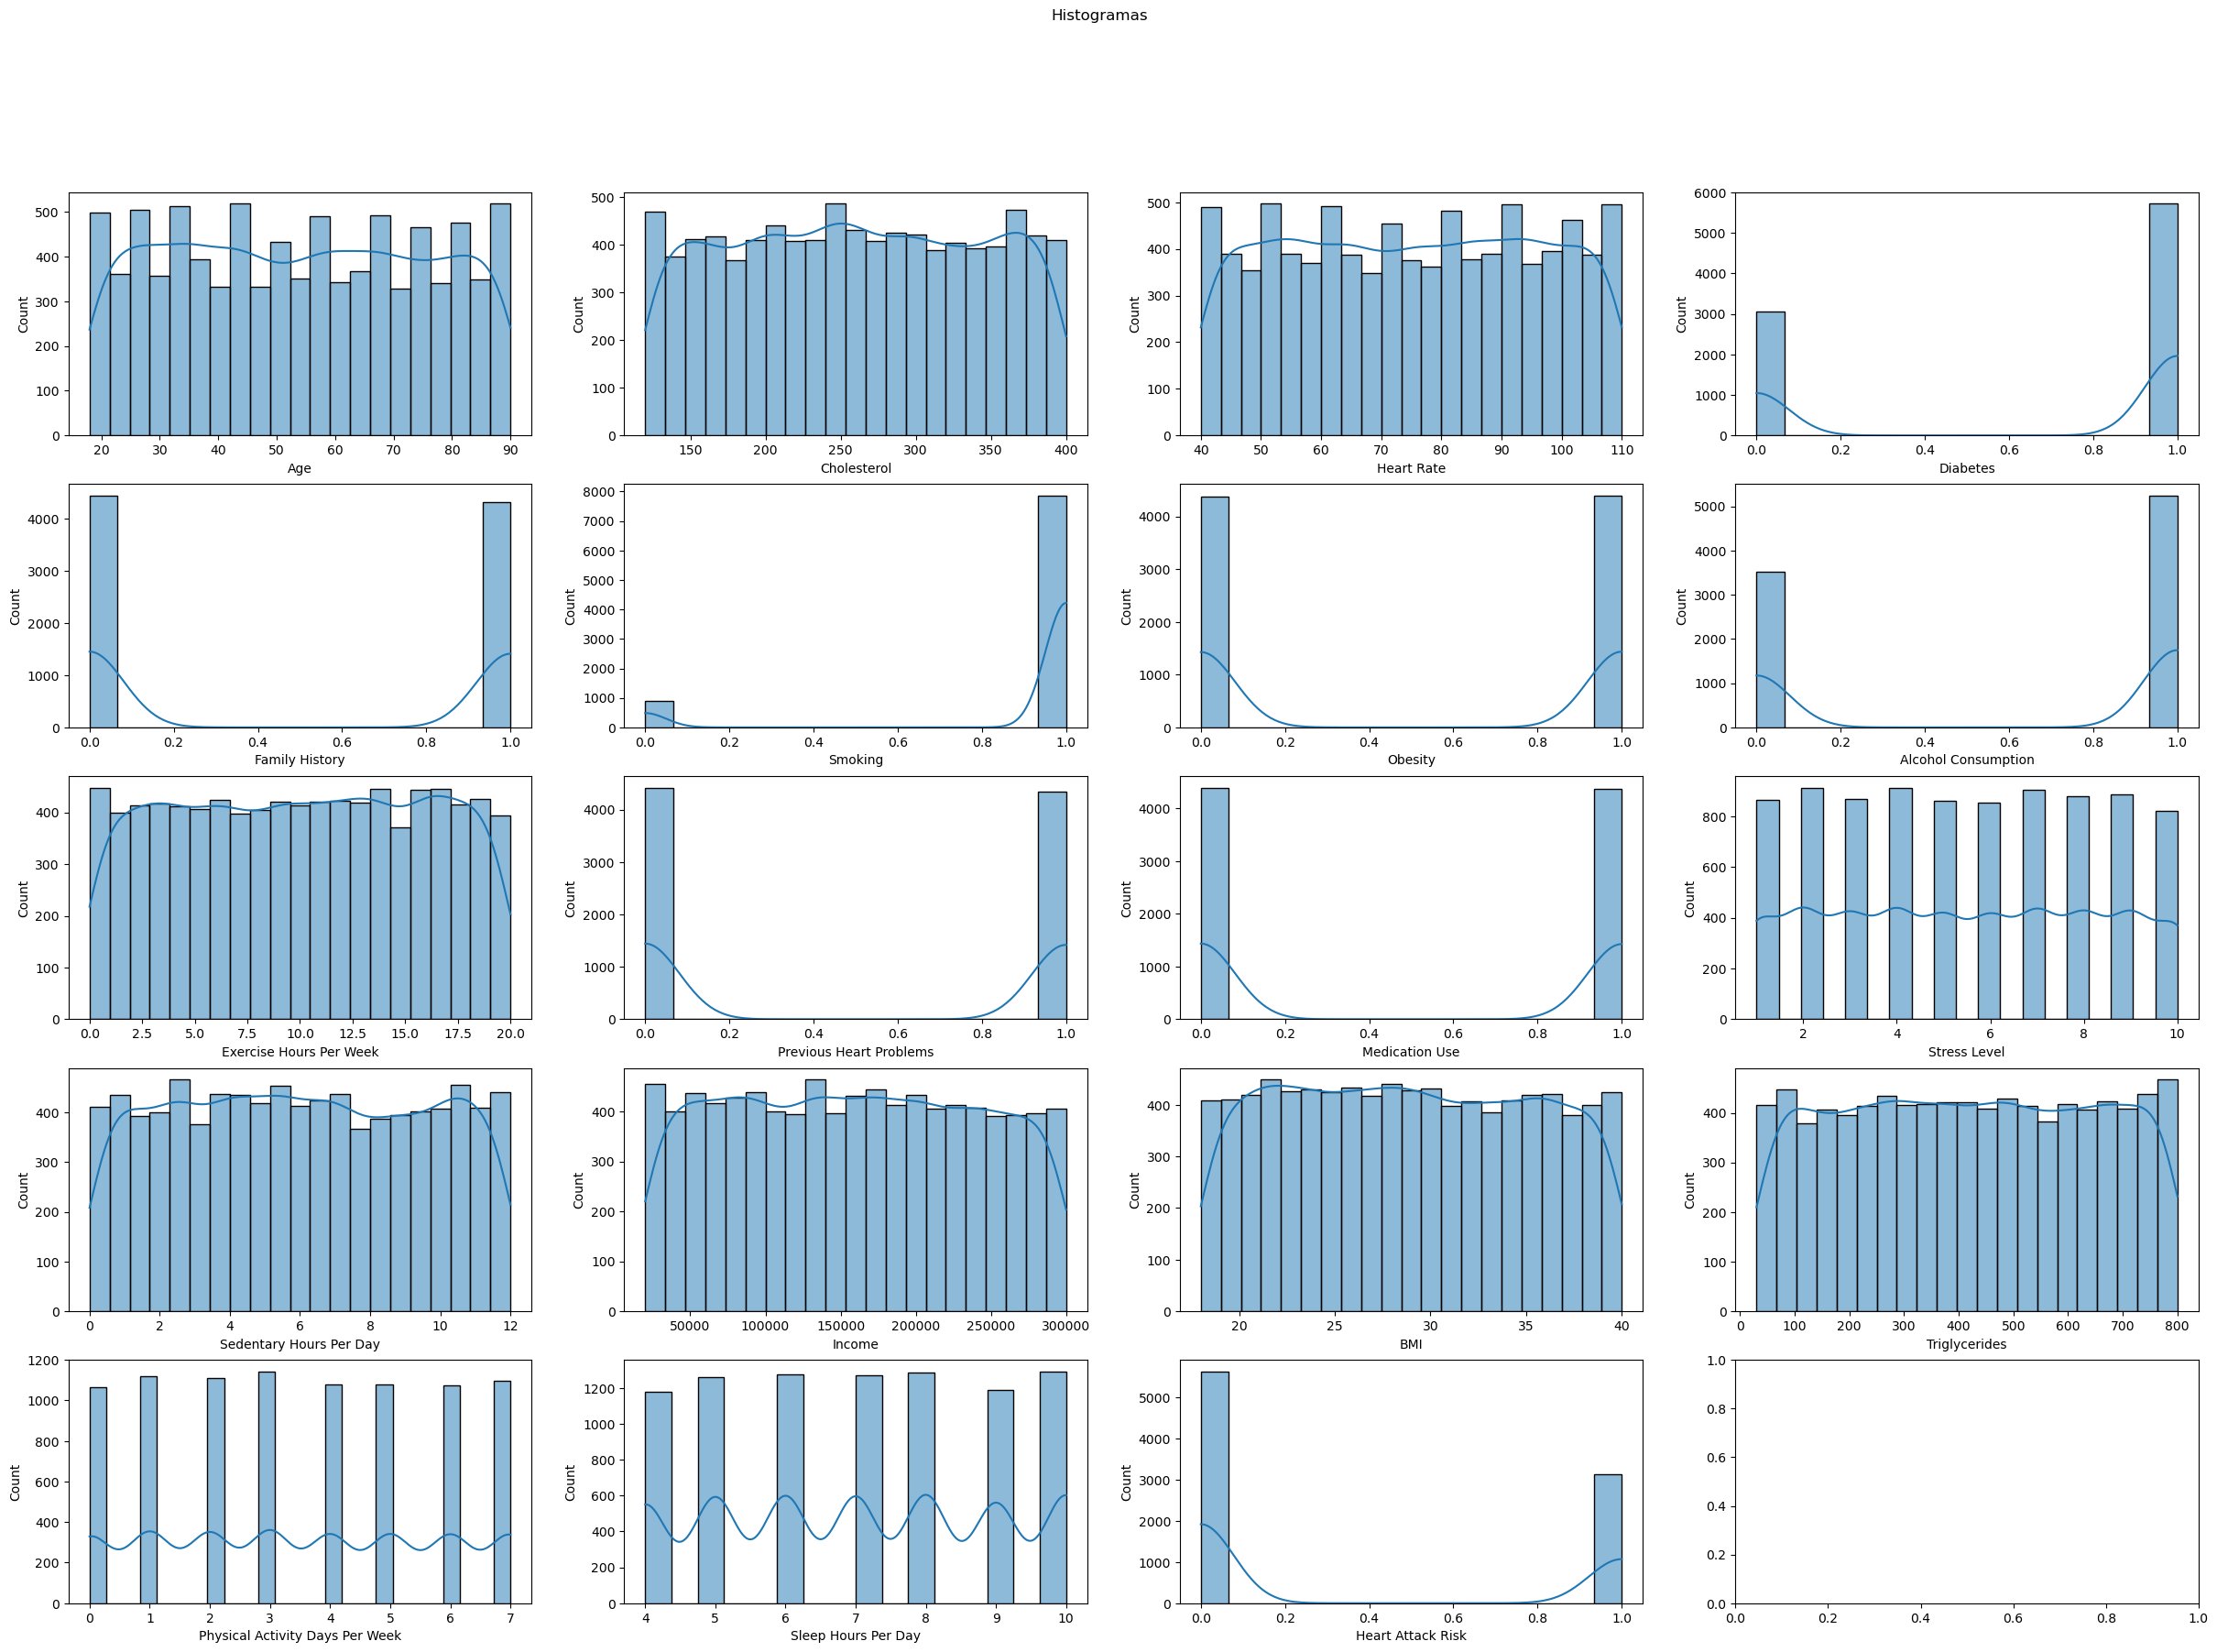

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [593]:
import warnings
warnings.filterwarnings("ignore")

def distribuicao_dos_atributos(dataframe):
    columns_number = 4
    lines_number = 5
    fig, axs = plt.subplots(lines_number,columns_number,figsize=(30,20))
    fig.suptitle('Histogramas')
    columns = list(dataframe.select_dtypes(include=np.number).columns)
    i = 0; j = 0
    for elem in columns:
        plt.figure(figsize = (10,8))
        sns.histplot(x = dataframe[elem], data=dataframe, ax=axs[i,j], kde=True)
        j = j + 1
        if(j == columns_number):
            i=i+1
            j = 0

distribuicao_dos_atributos(dataf)


De forma a obtermos mais informação sobre os dados presentes no nosso dataset, vamos iterar cada uma das variáveis que consideramos relevantes:

#### Variáveis Categóricas

##### Género do paciente

In [594]:
sex_counts= dataf['Sex'].value_counts()
print(sex_counts)


sex_proportion = dataf['Sex'].value_counts(normalize=True)
print(sex_proportion)

Sex
Male      6111
Female    2652
Name: count, dtype: int64
Sex
Male      0.697364
Female    0.302636
Name: proportion, dtype: float64


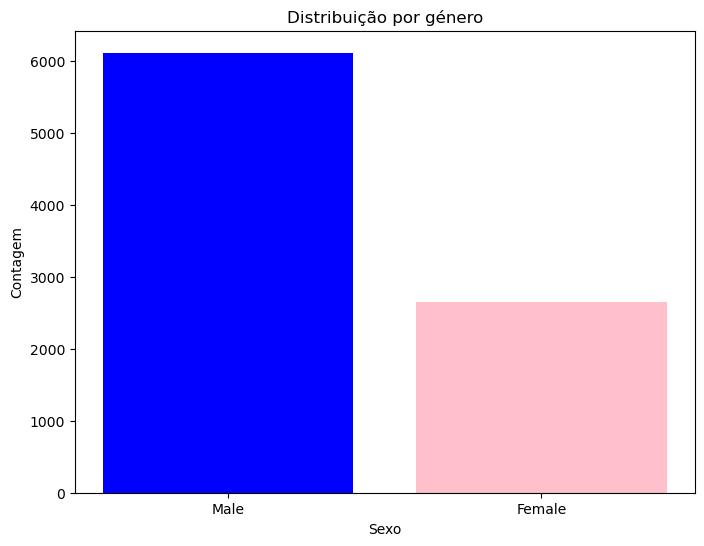

In [595]:
plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'pink'])
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.title('Distribuição por género')
plt.show()

##### Diabetes

In [596]:
diabetes_counts= dataf['Diabetes'].value_counts()
print(diabetes_counts)


diabetes_proportion = dataf['Diabetes'].value_counts(normalize=True)
print(diabetes_proportion)

Diabetes
1    5716
0    3047
Name: count, dtype: int64
Diabetes
1    0.652288
0    0.347712
Name: proportion, dtype: float64


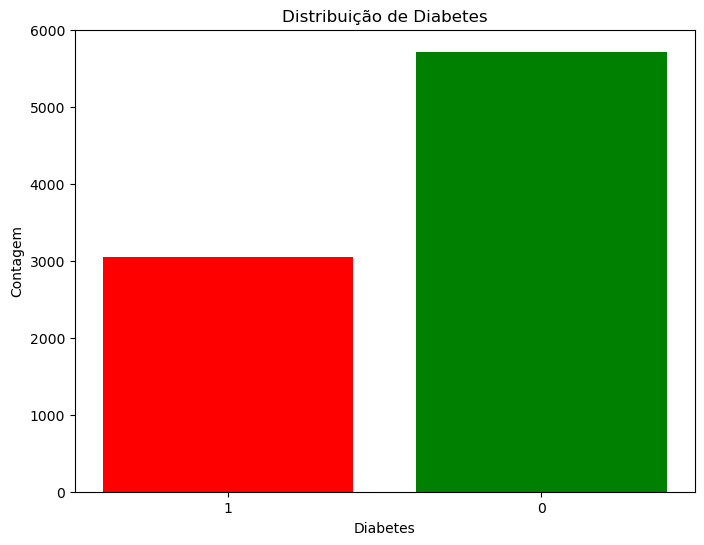

In [597]:
plt.figure(figsize=(8, 6))
plt.bar(diabetes_counts.index, diabetes_counts.values, color=['green', 'red'])
plt.xlabel('Diabetes')
plt.ylabel('Contagem')
plt.title('Distribuição de Diabetes')
#de forma ao eixo do x só ser dividido em valores inteiros (0 e 1)
plt.xticks(range(len(diabetes_counts.index)), [int(x) for x in diabetes_counts.index])
plt.show()

##### Histórico familiar de doenças relacionadas

In [598]:
fh_counts= dataf['Family History'].value_counts()
print(fh_counts)


fh_proportion = dataf['Family History'].value_counts(normalize=True)
print(fh_proportion)

Family History
0    4443
1    4320
Name: count, dtype: int64
Family History
0    0.507018
1    0.492982
Name: proportion, dtype: float64


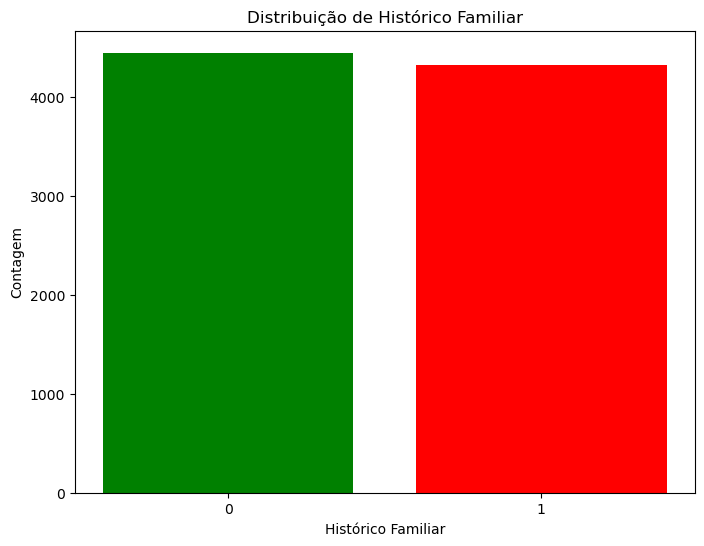

In [599]:
plt.figure(figsize=(8, 6))
plt.bar(fh_counts.index, fh_counts.values, color=['green', 'red'])
plt.xlabel('Histórico Familiar')
plt.ylabel('Contagem')
plt.title('Distribuição de Histórico Familiar')
#de forma ao eixo do x só ser dividido em valores inteiros (0 e 1)
plt.xticks(range(len(fh_counts.index)), [int(x) for x in fh_counts.index])
plt.show()

##### Fumador

In [600]:
smkng_counts= dataf['Smoking'].value_counts()
print(smkng_counts)


smkng_proportion = dataf['Smoking'].value_counts(normalize=True)
print(smkng_proportion)

Smoking
1    7859
0     904
Name: count, dtype: int64
Smoking
1    0.896839
0    0.103161
Name: proportion, dtype: float64


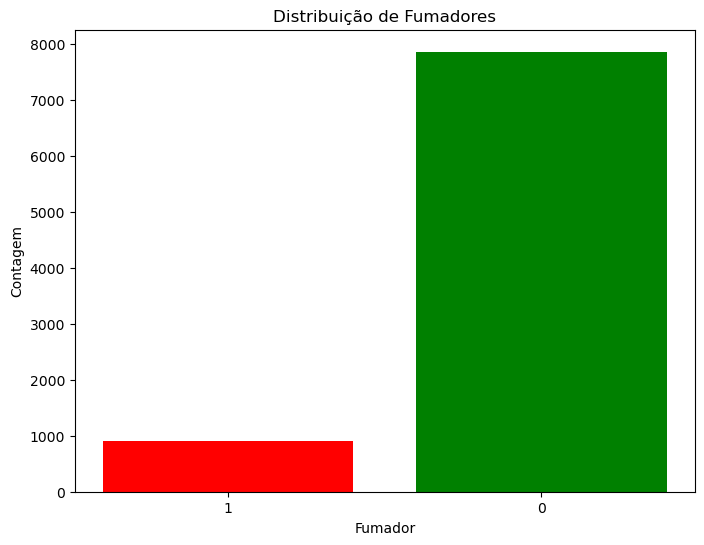

In [601]:
plt.figure(figsize=(8, 6))
plt.bar(smkng_counts.index, smkng_counts.values, color=['green', 'red'])
plt.xlabel('Fumador')
plt.ylabel('Contagem')
plt.title('Distribuição de Fumadores')
#de forma ao eixo do x só ser dividido em valores inteiros (0 e 1)
plt.xticks(range(len(smkng_counts.index)), [int(x) for x in smkng_counts.index])
plt.show()

##### Obesidade

In [602]:
obe_counts= dataf['Obesity'].value_counts()
print(obe_counts)


obe_proportion = dataf['Obesity'].value_counts(normalize=True)
print(obe_proportion)

Obesity
1    4394
0    4369
Name: count, dtype: int64
Obesity
1    0.501426
0    0.498574
Name: proportion, dtype: float64


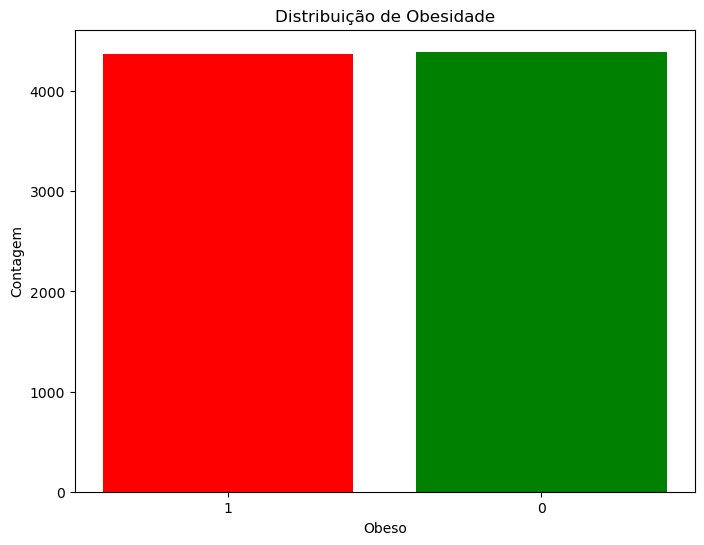

In [603]:
plt.figure(figsize=(8, 6))
plt.bar(obe_counts.index, obe_counts.values, color=['green', 'red'])
plt.xlabel('Obeso')
plt.ylabel('Contagem')
plt.title('Distribuição de Obesidade')
#de forma ao eixo do x só ser dividido em valores inteiros (0 e 1)
plt.xticks(range(len(obe_counts.index)), [int(x) for x in obe_counts.index])
plt.show()

##### Consumo de Álcool

In [604]:
alc_counts= dataf['Alcohol Consumption'].value_counts()
print(alc_counts)


alc_proportion = dataf['Alcohol Consumption'].value_counts(normalize=True)
print(alc_proportion)

Alcohol Consumption
1    5241
0    3522
Name: count, dtype: int64
Alcohol Consumption
1    0.598083
0    0.401917
Name: proportion, dtype: float64


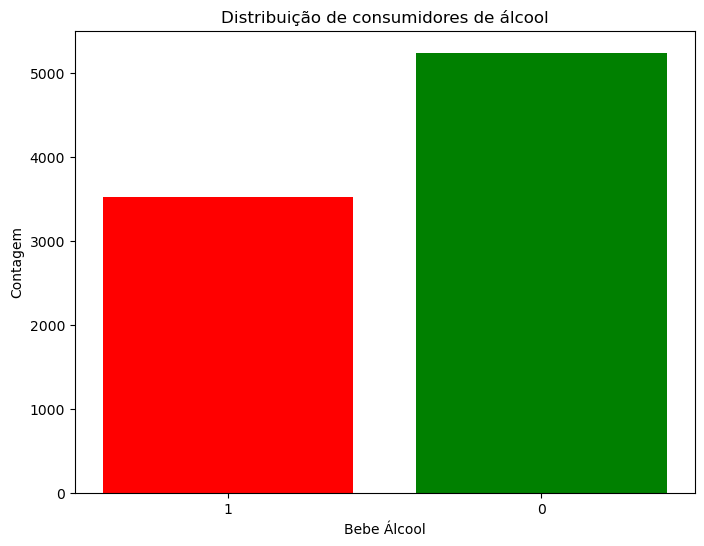

In [605]:
plt.figure(figsize=(8, 6))
plt.bar(alc_counts.index, alc_counts.values, color=['green', 'red'])
plt.xlabel('Bebe Álcool')
plt.ylabel('Contagem')
plt.title('Distribuição de consumidores de álcool')
#de forma ao eixo do x só ser dividido em valores inteiros (0 e 1)
plt.xticks(range(len(alc_counts.index)), [int(x) for x in alc_counts.index])
plt.show()

##### Tipo de dieta 

In [606]:
diet_counts= dataf['Diet'].value_counts()
print(diet_counts)


diet_proportion = dataf['Diet'].value_counts(normalize=True)
print(diet_proportion)

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64
Diet
Healthy      0.337784
Average      0.332306
Unhealthy    0.329910
Name: proportion, dtype: float64


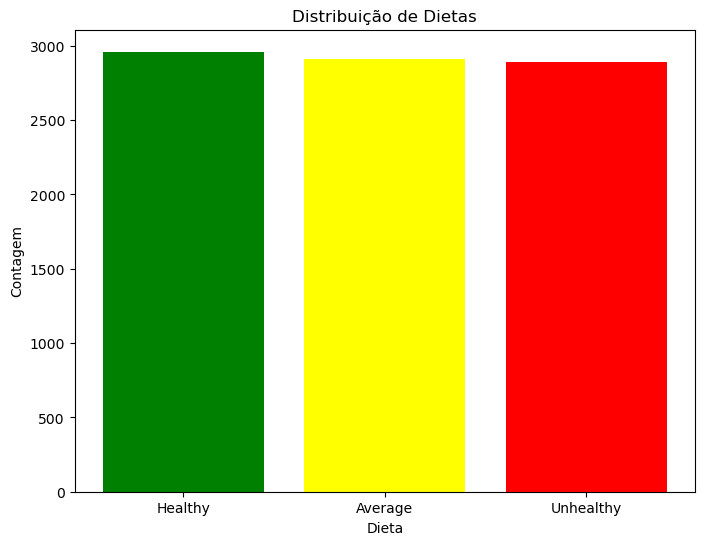

In [607]:
plt.figure(figsize=(8, 6))
plt.bar(diet_counts.index, diet_counts.values, color=['green', 'yellow', 'red'])
plt.xlabel('Dieta')
plt.ylabel('Contagem')
plt.title('Distribuição de Dietas')
plt.show()

##### Histórico de problemas cardíacos

In [608]:
php_counts= dataf['Previous Heart Problems'].value_counts()
print(php_counts)


php_proportion = dataf['Previous Heart Problems'].value_counts(normalize=True)
print(php_proportion)

Previous Heart Problems
0    4418
1    4345
Name: count, dtype: int64
Previous Heart Problems
0    0.504165
1    0.495835
Name: proportion, dtype: float64


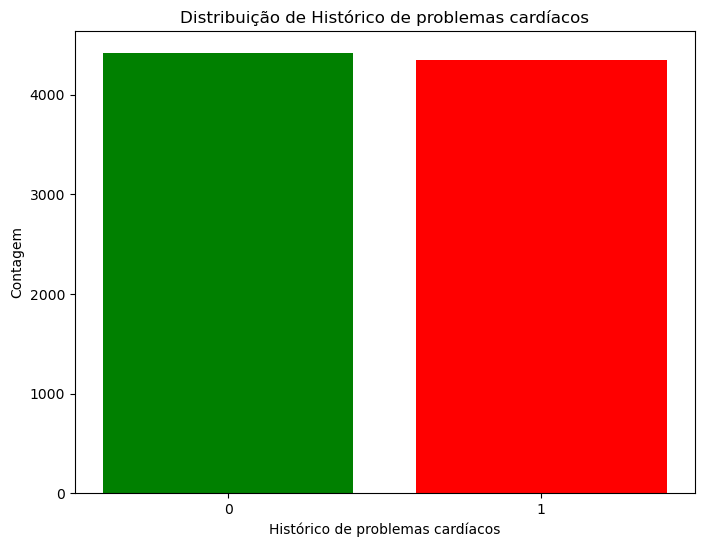

In [609]:
plt.figure(figsize=(8, 6))
plt.bar(php_counts.index, php_counts.values, color=['green', 'red'])
plt.xlabel('Histórico de problemas cardíacos')
plt.ylabel('Contagem')
plt.title('Distribuição de Histórico de problemas cardíacos')
#de forma ao eixo do x só ser dividido em valores inteiros (0 e 1)
plt.xticks(range(len(php_counts.index)), [int(x) for x in php_counts.index])
plt.show()

##### Uso de medicação

In [610]:
med_counts = dataf['Medication Use'].value_counts()
print (med_counts)

med_proportion = dataf['Medication Use'].value_counts(normalize=True)
print (med_proportion)

Medication Use
0    4396
1    4367
Name: count, dtype: int64
Medication Use
0    0.501655
1    0.498345
Name: proportion, dtype: float64


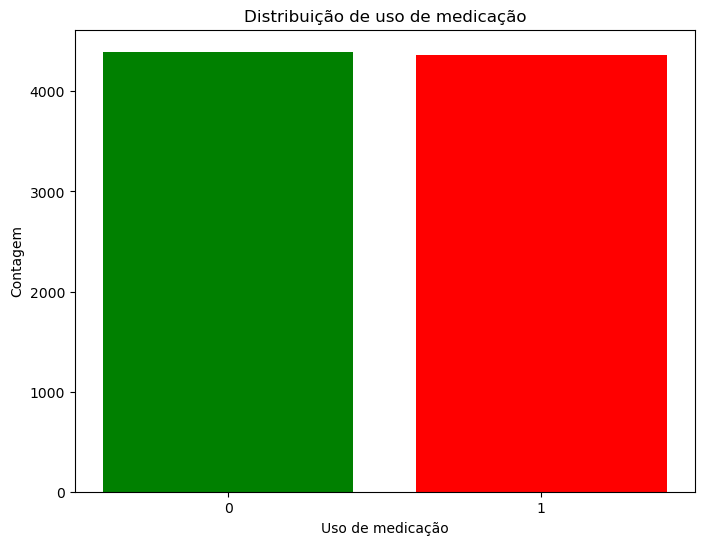

In [611]:
plt.figure(figsize=(8, 6))
plt.bar(med_counts.index, med_counts.values, color=['green', 'red'])
plt.xlabel('Uso de medicação')
plt.ylabel('Contagem')
plt.title('Distribuição de uso de medicação')
#de forma ao eixo do x só ser dividido em valores inteiros (0 e 1)
plt.xticks(range(len(med_counts.index)), [int(x) for x in med_counts.index])
plt.show()

#### Variáveis Numéricas

In [612]:
dataf['Age'].describe()

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64

De forma a melhor analisarmos de que forma a idade do paciente se relaciona com outros fatores, dividimos as idades nas seguintes faixas etárias:

- **Criança** : 0-18 anos
- **Jovem** : 18-35 anos
- **Adulto** : 35-65 anos
- **Sénior** : 65-120 anos

In [613]:
bins = [0, 18, 35, 65, 120]  
labels = ["Criança", "Jovem", "Adulto", "Sénior"]  

dataf['Age_Group'] = pd.cut(dataf['Age'], bins=bins, labels=labels)


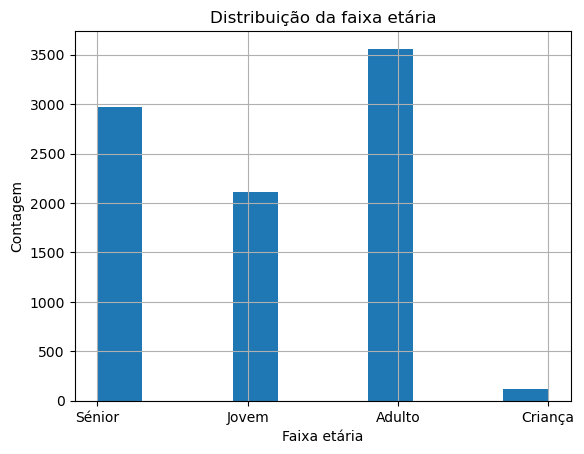

In [614]:
dataf['Age_Group'].hist()
plt.xlabel("Faixa etária")
plt.ylabel("Contagem")
plt.title("Distribuição da faixa etária")
plt.show()

In [615]:
dataf['Cholesterol'].describe()

count    8763.000000
mean      259.877211
std        80.863276
min       120.000000
25%       192.000000
50%       259.000000
75%       330.000000
max       400.000000
Name: Cholesterol, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


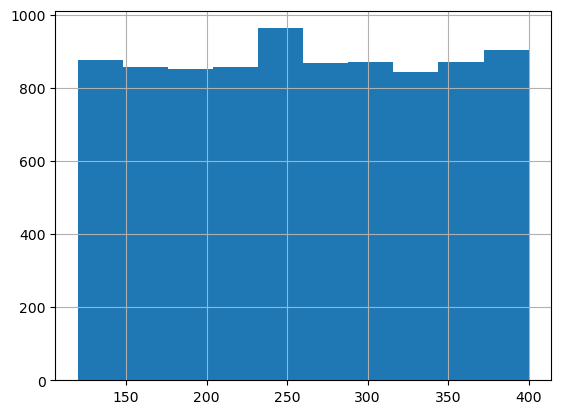

In [616]:
print(f"Histogram:{dataf['Cholesterol'].hist()}")

In [617]:
dataf['Heart Rate'].describe()

count    8763.000000
mean       75.021682
std        20.550948
min        40.000000
25%        57.000000
50%        75.000000
75%        93.000000
max       110.000000
Name: Heart Rate, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


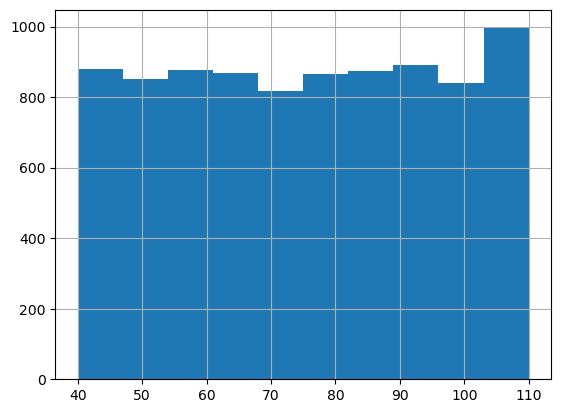

In [618]:
print(f"Histogram:{dataf['Heart Rate'].hist()}")

In [619]:
dataf['Exercise Hours Per Week'].describe()

count    8763.000000
mean       10.014284
std         5.783745
min         0.002442
25%         4.981579
50%        10.069559
75%        15.050018
max        19.998709
Name: Exercise Hours Per Week, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


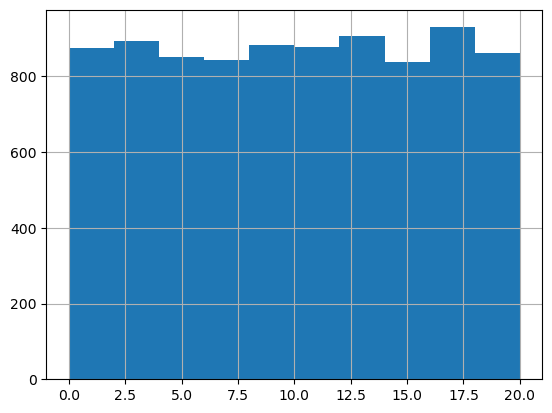

In [620]:
print(f"Histogram:{dataf['Exercise Hours Per Week'].hist()}")

In [621]:
dataf['Stress Level'].describe()

count    8763.000000
mean        5.469702
std         2.859622
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Stress Level, dtype: float64

Podemos também dividir as faixas de stress nas seguintes categorias:
- **Baixo stress**: 0-3
- **Stress moderado** : 3-6
- **Stress alto**: 6-10

In [622]:
bins = [0,3,6,10]  
labels = ["Baixo", "Moderado", "Alto"]  

dataf['Stress_Group'] = pd.cut(dataf['Stress Level'], bins=bins, labels=labels)


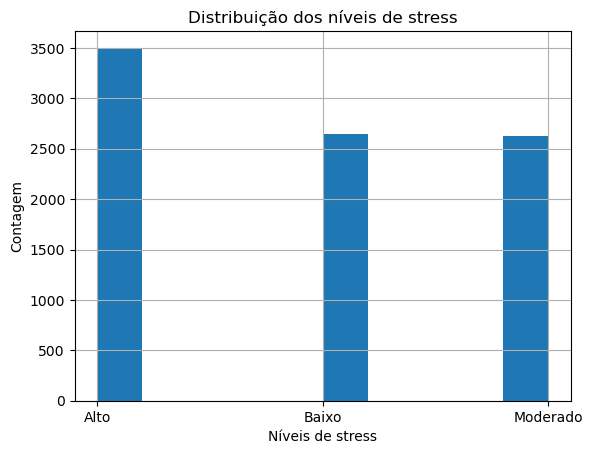

In [623]:
dataf['Stress_Group'].hist()
plt.xlabel("Níveis de stress")
plt.ylabel("Contagem")
plt.title("Distribuição dos níveis de stress")
plt.show()

In [624]:
dataf['Sedentary Hours Per Day'].describe()

count    8763.000000
mean        5.993690
std         3.466359
min         0.001263
25%         2.998794
50%         5.933622
75%         9.019124
max        11.999313
Name: Sedentary Hours Per Day, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


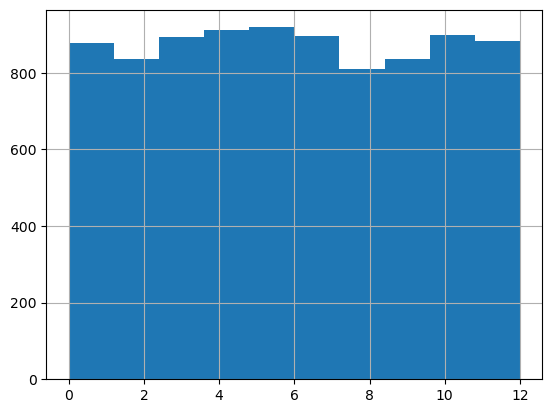

In [625]:
print(f"Histogram:{dataf['Sedentary Hours Per Day'].hist()}")

In [626]:
dataf['Income'].describe()

count      8763.000000
mean     158263.181901
std       80575.190806
min       20062.000000
25%       88310.000000
50%      157866.000000
75%      227749.000000
max      299954.000000
Name: Income, dtype: float64

Usando estas estatísticas podemos efetuar o binning no atributo Income, dividindo-o nas seguintes categorias:
- **Baixo** : 20062-88310 
- **Médio Baixo** : 88310-157866 
- **Médio Alto** : 157866-227749
- **Alto** : 227749-299954

In [627]:
bins = [20062, 88310, 157866, 227749, 299954] 
labels = ["Baixo", "Médio Baixo", "Médio Alto", "Alto"]

dataf['Income_Group'] = pd.cut(dataf['Income'], bins=bins, labels=labels)

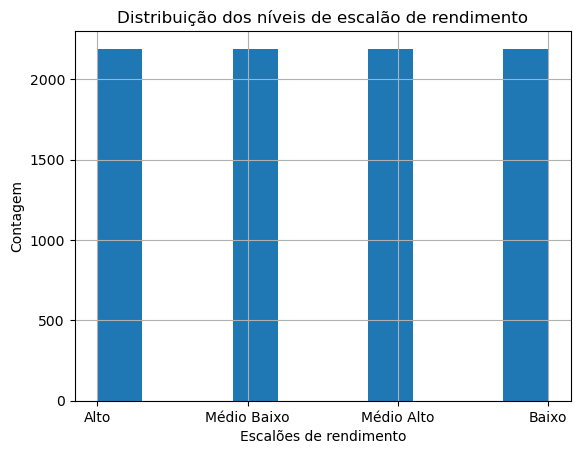

In [628]:
dataf['Income_Group'].hist()
plt.xlabel("Escalões de rendimento")
plt.ylabel("Contagem")
plt.title("Distribuição dos níveis de escalão de rendimento")
plt.show()

In [629]:
dataf['BMI'].describe()

count    8763.000000
mean       28.891446
std         6.319181
min        18.002337
25%        23.422985
50%        28.768999
75%        34.324594
max        39.997211
Name: BMI, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


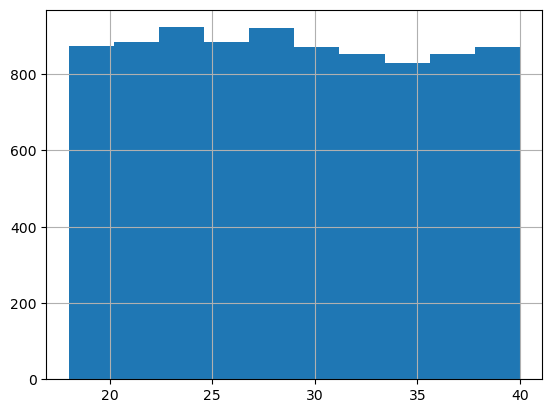

In [630]:
print(f"Histogram:{dataf['BMI'].hist()}")

In [631]:
dataf['Triglycerides'].describe()

count    8763.000000
mean      417.677051
std       223.748137
min        30.000000
25%       225.500000
50%       417.000000
75%       612.000000
max       800.000000
Name: Triglycerides, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


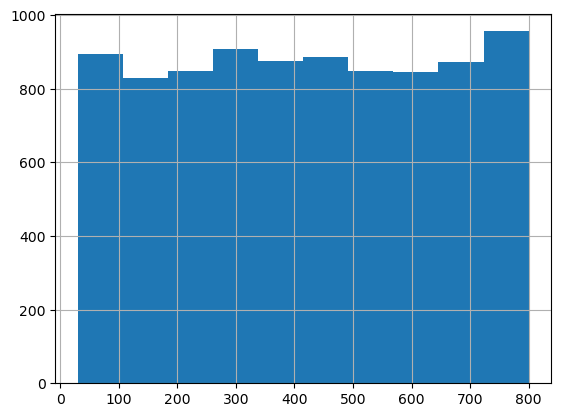

In [632]:
print(f"Histogram:{dataf['Triglycerides'].hist()}")

In [633]:
dataf['Physical Activity Days Per Week'].describe()

count    8763.000000
mean        3.489672
std         2.282687
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: Physical Activity Days Per Week, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


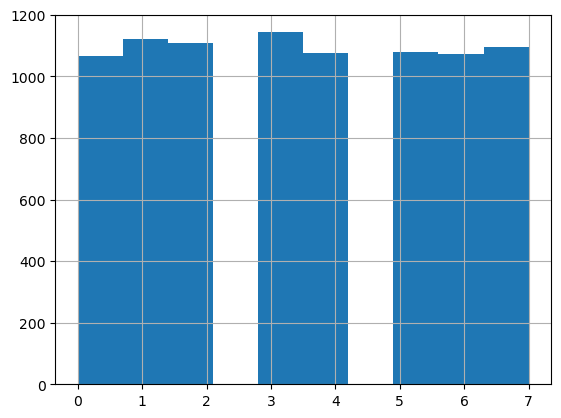

In [634]:
print(f"Histogram:{dataf['Physical Activity Days Per Week'].hist()}")

In [635]:
dataf['Sleep Hours Per Day'].describe()

count    8763.000000
mean        7.023508
std         1.988473
min         4.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: Sleep Hours Per Day, dtype: float64

Podemos também efetuar binning nesta variável, dividindo as horas de sono por dia nas seguintes categorias:
- **Muito Baixo**: Menos de 5 horas por dia
- **Baixo**: De 5 a 7 horas por dia
- **Médio** : de 7 a 9 horas por dia
- **Alto** : 9 ou mais horas por dia

In [636]:
bins = [0, 5, 7, 9, float('inf')] 
labels = ["Muito Baixo", "Baixo", "Médio", "Alto"]

dataf['hs_Group'] = pd.cut(dataf['Sleep Hours Per Day'], bins=bins, labels=labels)


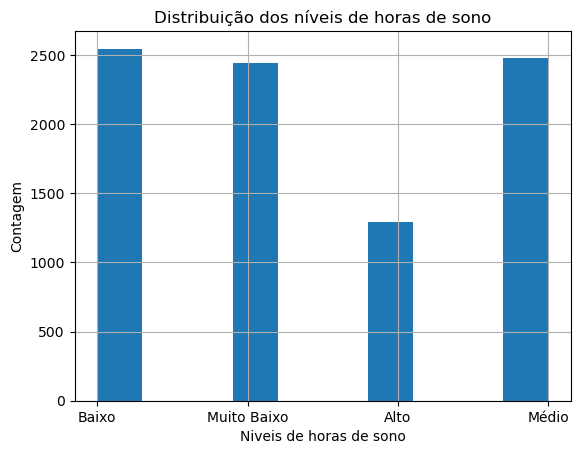

In [637]:
dataf['hs_Group'].hist()
plt.xlabel("Niveis de horas de sono")
plt.ylabel("Contagem")
plt.title("Distribuição dos níveis de horas de sono")
plt.show()

### Preprocess Data

Devido ao facto do atributo 'Blood Pressure' se encontrar no formato int x/int y, o grupo procurou o que significava cada um dos valores que a caraterizam de forma a melhor podemos avaliar o efeito deste atributo.

Através da nossa pesquisa e de acordo com os dados públicos disponibilizados pelo website do Hospital da Luz (https://www.hospitaldaluz.pt/pt/dicionario-de-saude/pressao-arterial-e-hipertensao) sabemos que de em que x é o valor da pressão arterial máxima ou sistólica, que é o valor durante a contração do coração (sístole) e y é o valor da pressão arterial mínima ou diastólica, que é o valor durante o relaxamento do coração (diástole).

Assim sendo, decidimos dividir o atributo 'Blood Pressure' em dois atributos:
- 'Systolic Pressure' : pressão arterial máxima ou sistólica
- 'Diastolic Pressure' : pressão arterial mínima ou diastólica

In [638]:

# Split 'Blood Pressure' into two separate variables
dataf[['Systolic Pressure', 'Diastolic Pressure']] = dataf['Blood Pressure'].str.split('/', expand=True).astype(float)

### Relação entre atributos

In [639]:
def relacao_entre_atributos(dataf):
    sns.pairplot(dataf)
    plt.show()


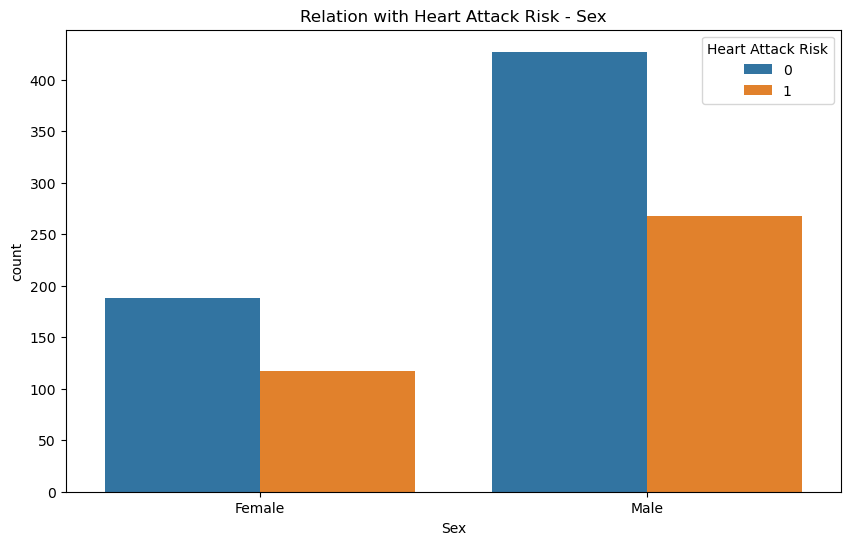

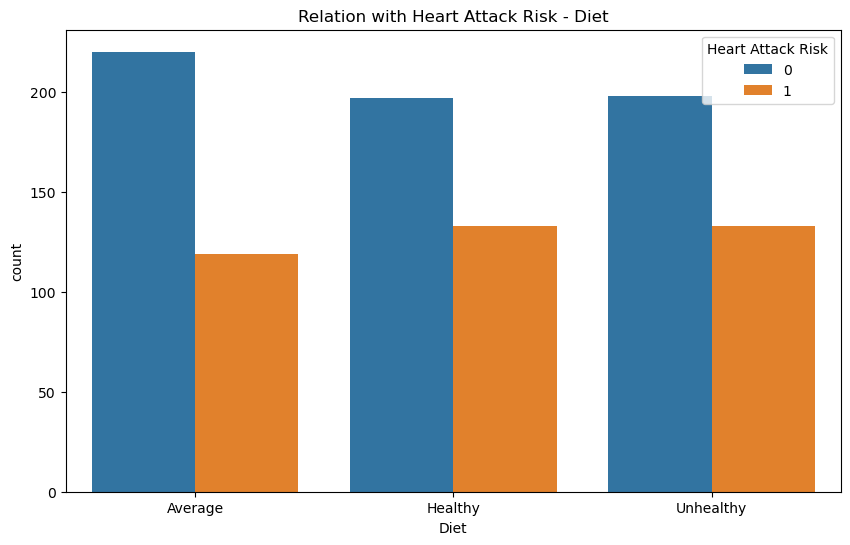

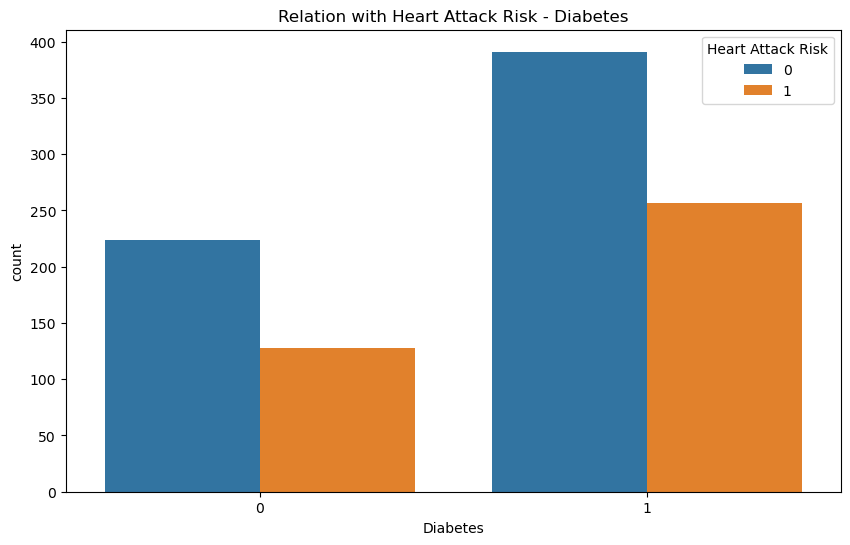

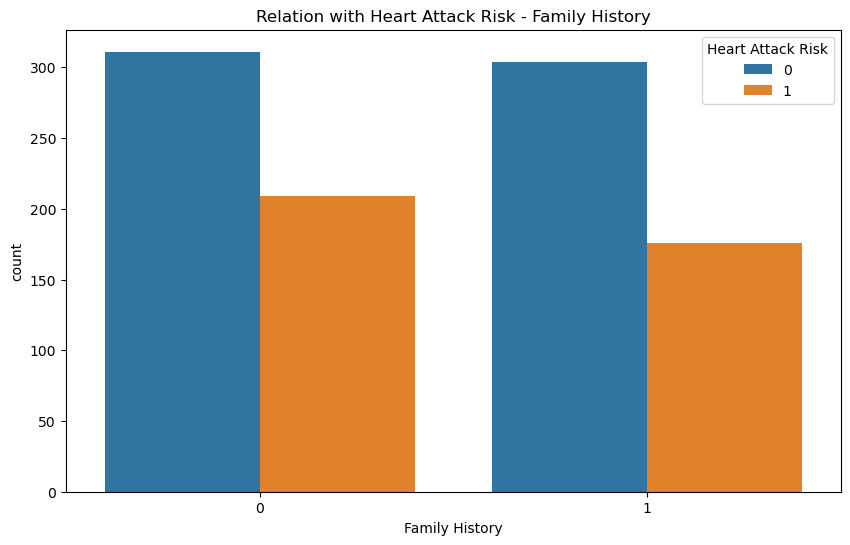

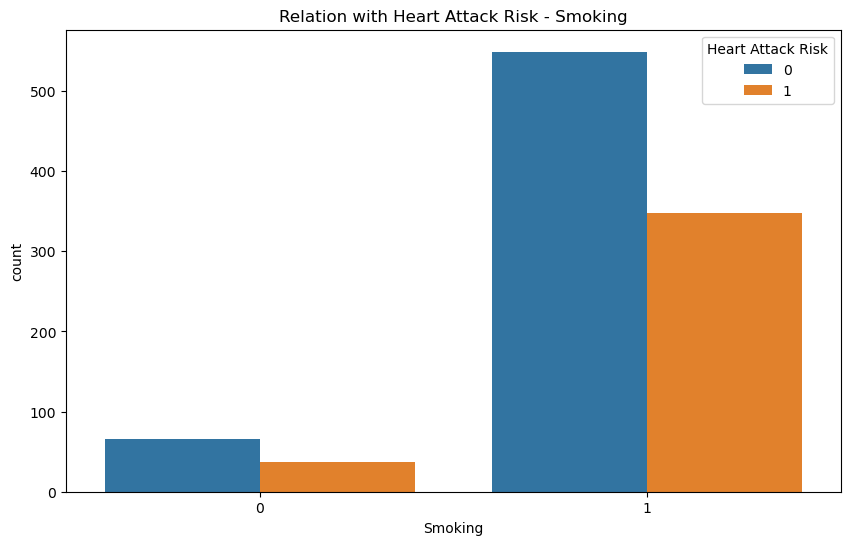

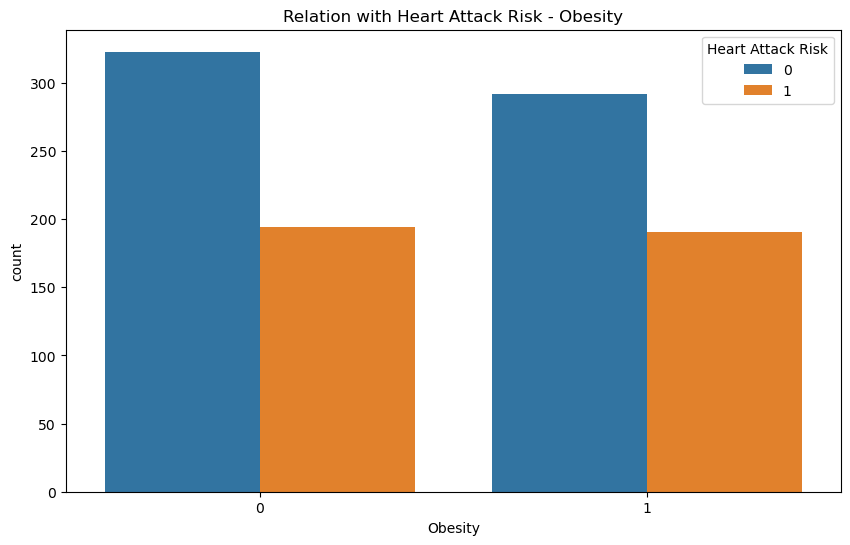

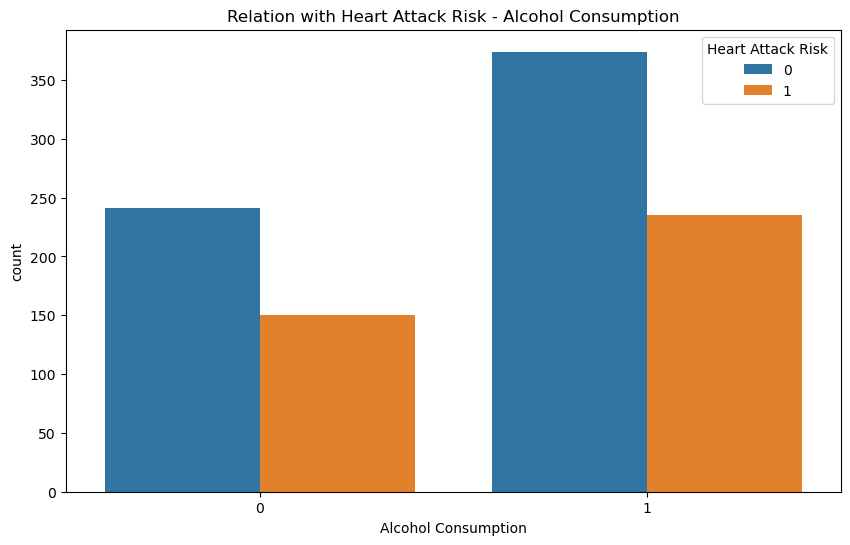

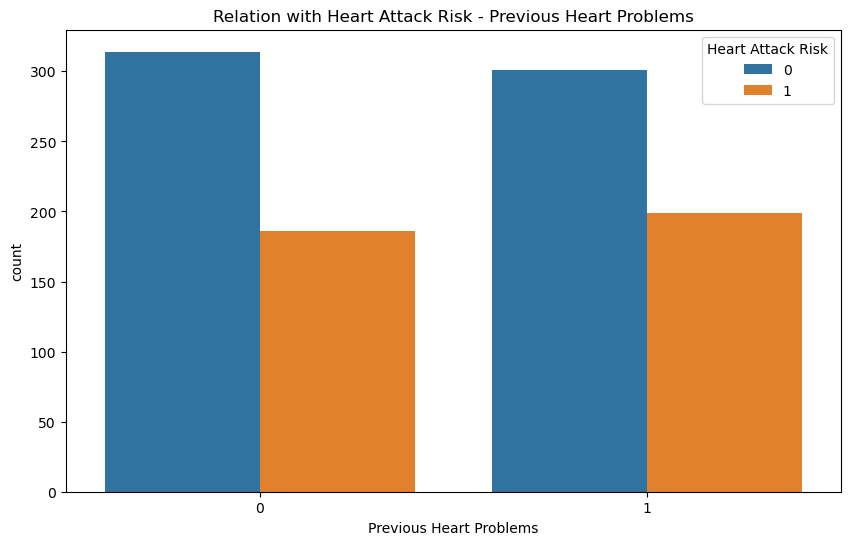

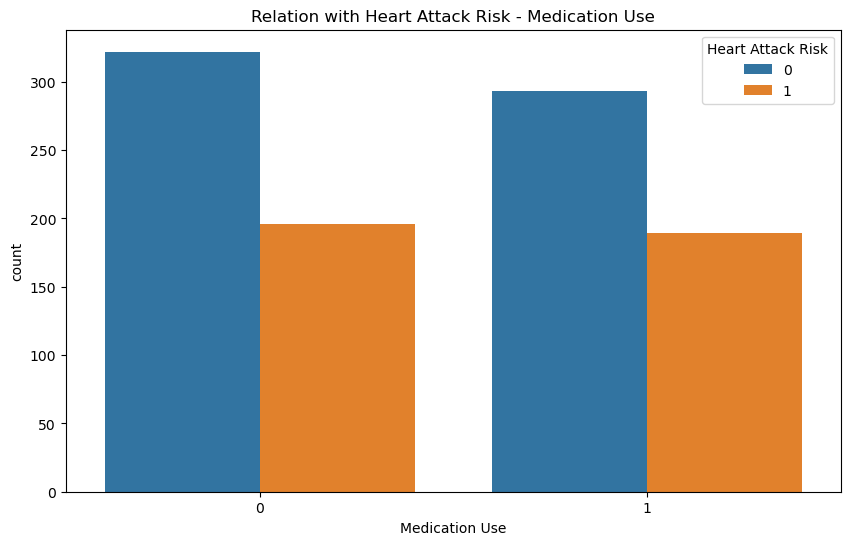

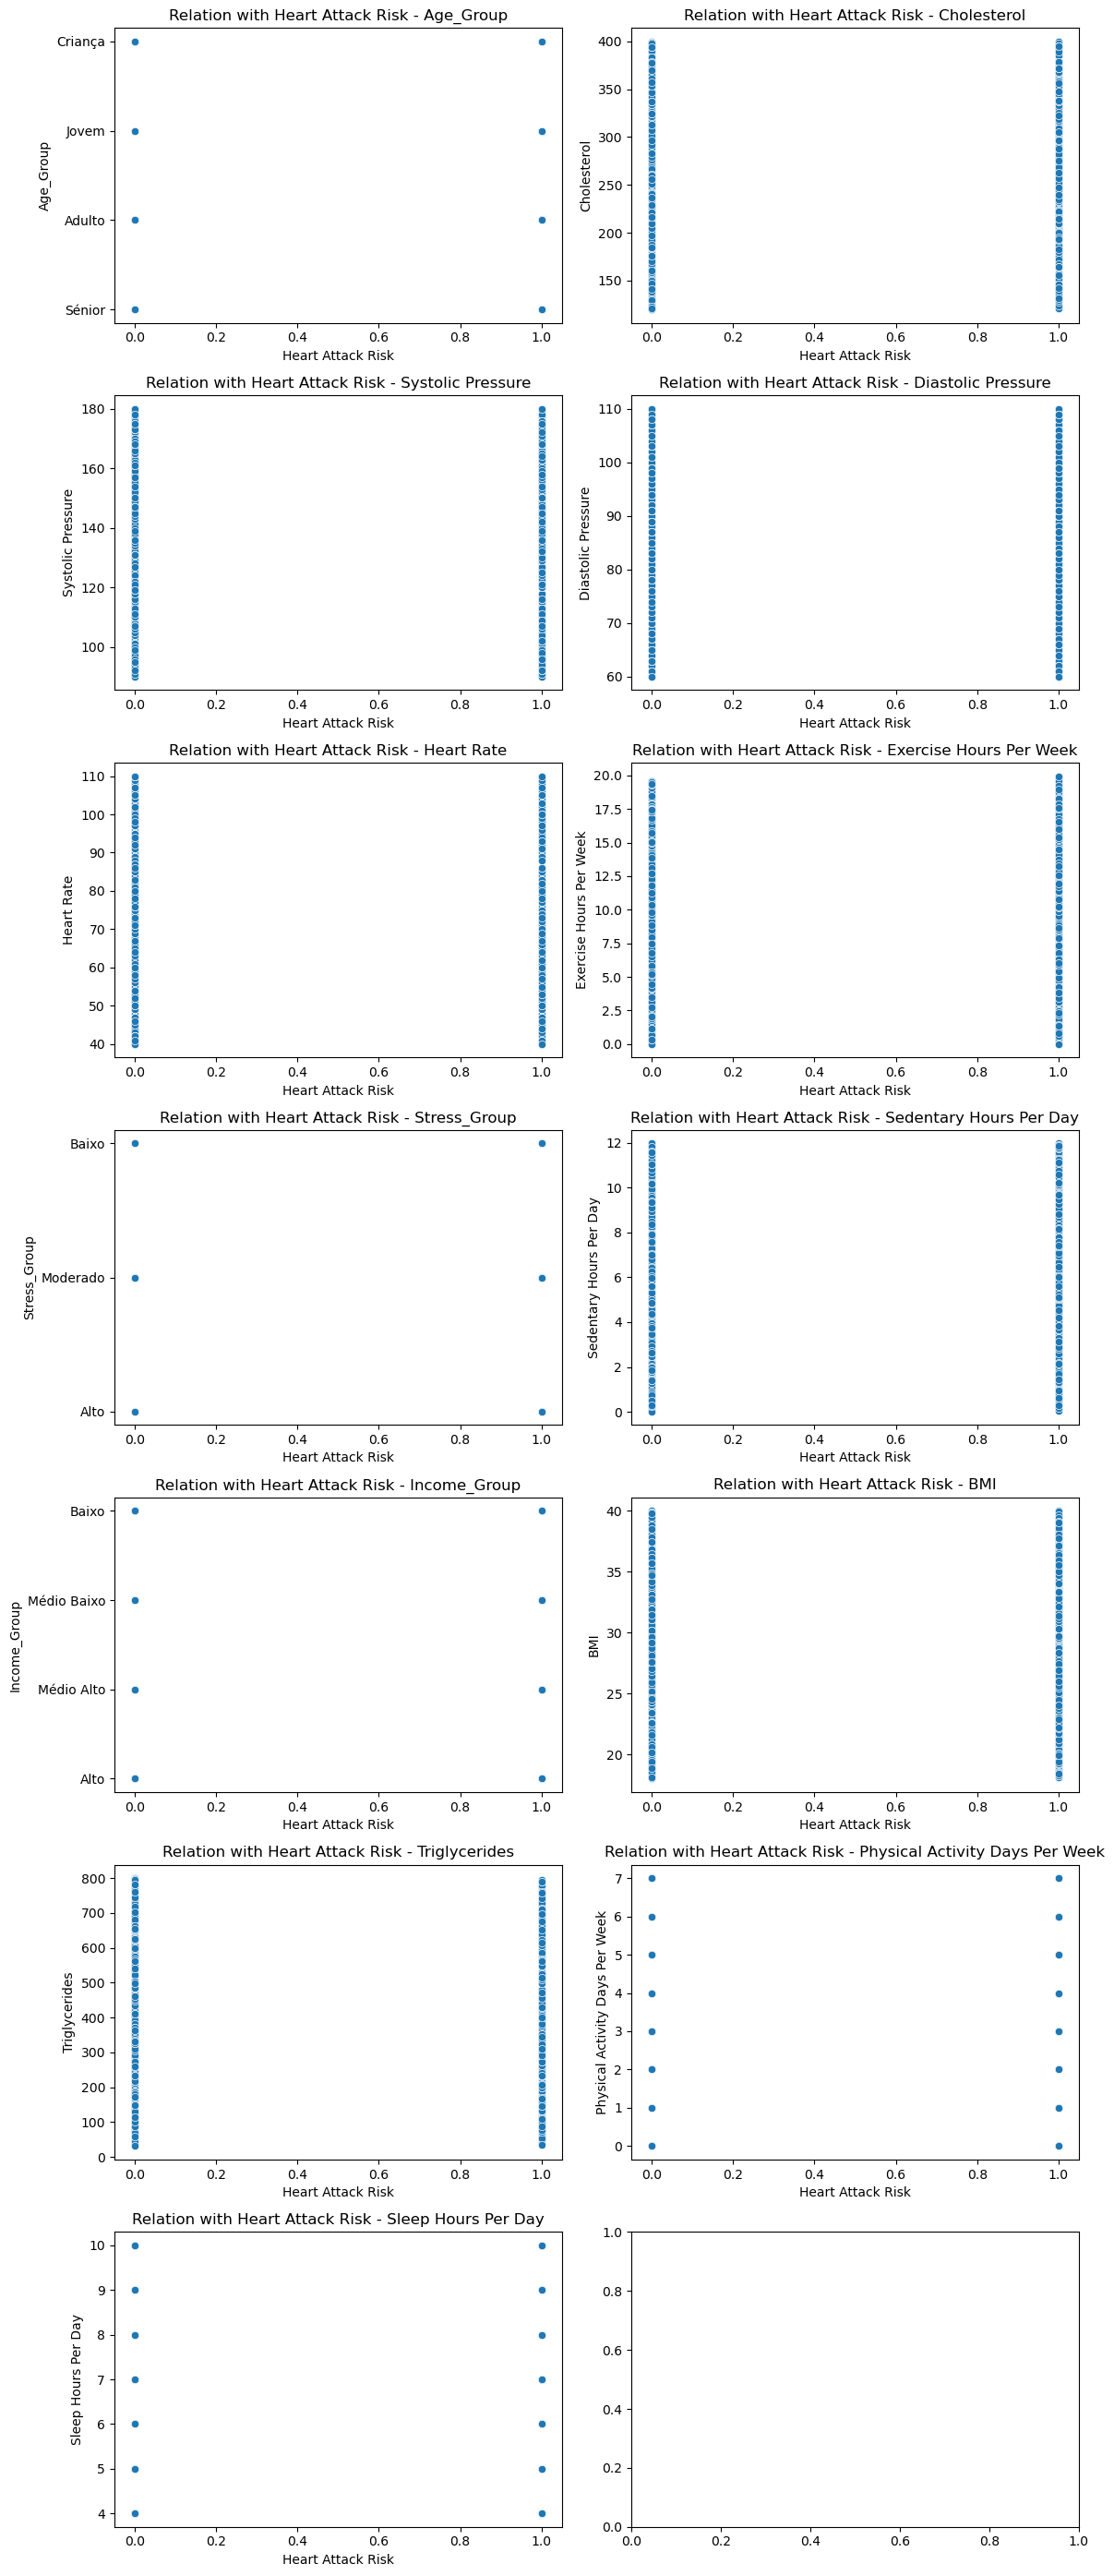

In [640]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

def relation_with_heart_attack_risk(df, categorical_vars=[], numerical_vars=[], binary_vars=[], sample_size=1000):
    # Take a random sample of the data
    df_sample = df.sample(min(sample_size, len(df)))
    
    # Plot bar plots for categorical and binary variables
    for var in categorical_vars + binary_vars:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=var, hue='Heart Attack Risk', data=df_sample)
        plt.title(f'Relation with Heart Attack Risk - {var}')
        plt.show()

    # Scatter plots for numerical variables
    n_cols = 2
    n_lines = (len(numerical_vars) - 1) // n_cols + 1
    
    fig, axs = plt.subplots(n_lines, n_cols, figsize=(12, 4 * n_lines))
    
    for i, var in enumerate(numerical_vars):
        sns.scatterplot(data=df_sample, x='Heart Attack Risk', y=var, ax=axs[i // n_cols, i % n_cols])
        axs[i // n_cols, i % n_cols].set_title(f'Relation with Heart Attack Risk - {var}')

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Divisao das variáveis de acordo com as categorias
categorical_vars = ['Sex', 'Diet']
numerical_vars = ['Age_Group', 'Cholesterol', 'Systolic Pressure', 'Diastolic Pressure', 'Heart Rate', 'Exercise Hours Per Week', 'Stress_Group', 'Sedentary Hours Per Day', 'Income_Group', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
binary_vars = ['Diabetes','Family History','Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use']

# Chamar a função para criar os gráficos de dispersão e barras
relation_with_heart_attack_risk(dataf, categorical_vars=categorical_vars, numerical_vars=numerical_vars, binary_vars=binary_vars, sample_size=1000)



#### Matriz de Correlação

Devido ao facto de termos atributos numéricos, categóricos e binários, de forma a podermos verificar a sua correlação através de uma matriz de correlação, e visto que esta só pode ser feita com valores numéricos decidimos converter os atributos binários para inteiros e, desta forma tratá-los como atributos numéricos.

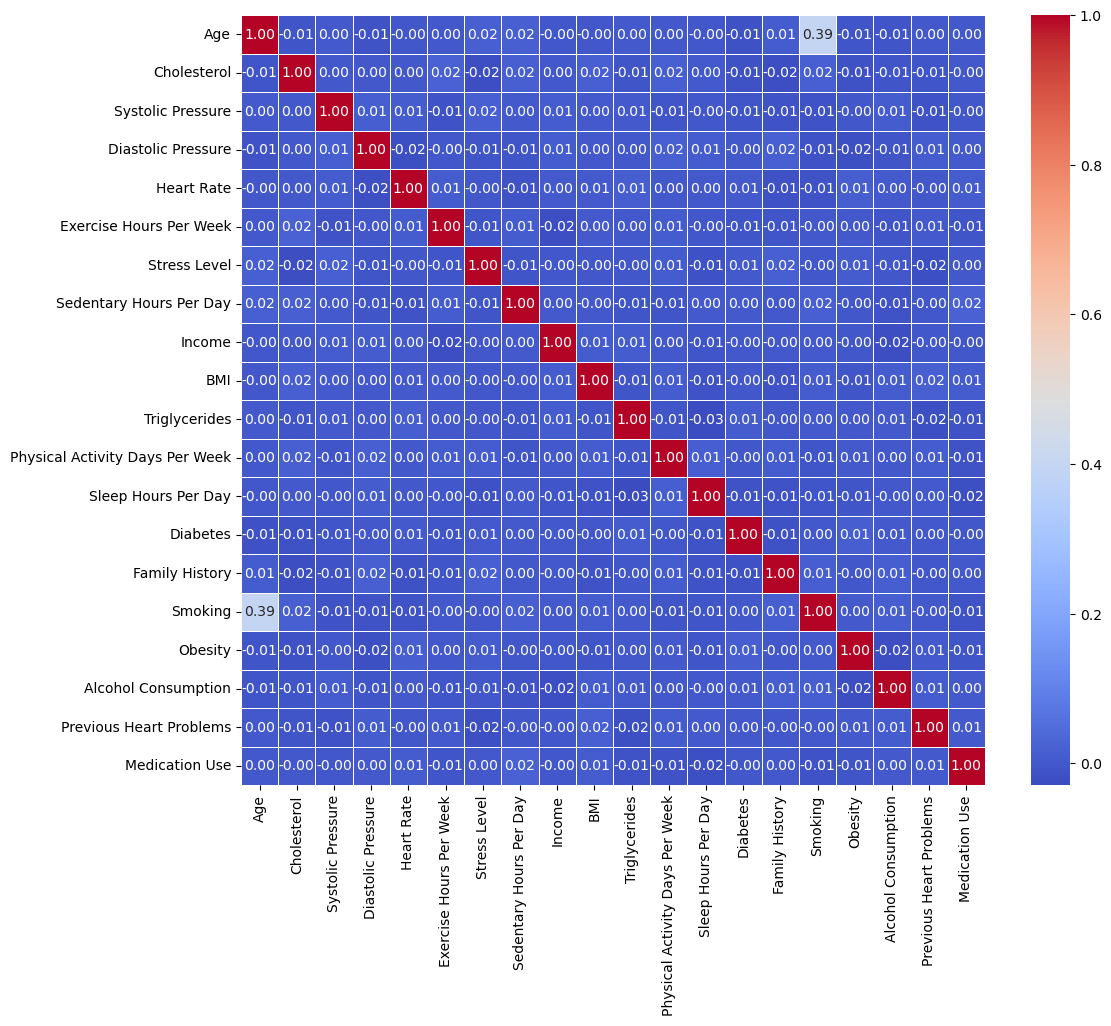

In [642]:
# Divisao das variáveis de acordo com as categorias

numerical_vars = ['Age', 'Cholesterol', 'Systolic Pressure', 'Diastolic Pressure', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
binary_vars = ['Diabetes','Family History','Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use']
#cópia do nosso dataframe
dataf2= dataf
# convertemos as variáveis binárias em numéricas
dataf2[binary_vars] = dataf2[binary_vars].apply(lambda x: x.astype(int))

correlation_matrix = dataf2[numerical_vars + binary_vars].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# Show the plot
plt.show()


Como podemos observar na tabela não existem atributos com elevada correlação entre eles.
Existe apenas uma leve correlação entre os atributos:
- 'smoking' e 'age'